In [1]:
import numpy as np
from IPython.display import Image # Just ignore this one for now...  next lecture, you will learn about it.
import os

##  Lecture 7

### Learning objectives

- Learn more ways to create **NumPy** `ndarray`’s
- Learn how to create and manipulate 2-dimensional `ndarray`’s.
- Learn some new methods of the `ndarray` class.
- Learn how to convert between the `ndarray` and `list` objects.
- Learn how to write an `ndarray` to a file.


### 7.1 NumPy and N-dimensional arrays

We briefly mentioned **arrays** in the last lecture but quickly moved into plotting (because that is more fun). But **arrays** are essential to our computational happiness, so we need to bite the bullet and learn about them now. 

**Arrays**  in **NumPy**  are somewhat  similar to  lists but there are important differences with advantages and disadvantages.
Unlike lists,   **arrays** are usually all of the same data type (`dtype`), usually numbers (integers or floats) and at times characters.  A "feature" of arrays is that the size,  shape and type are fixed when it's created. 

Remember, we can define a list:

```python
L = []
```

then append to it as desired using the `L.append()` method. It is more complicated (but still possible) to **extend** arrays. 

Why use arrays when you can use lists?  Arrays are far more computationally efficient than lists, particularly for things like matrix math.  You can perform calculations on the entire array in one go instead of looping through element by element as for lists.  

To make things a little confusing, there are  several different data objects that are loosely called arrays, e.g., arrays, character arrays and matrices.  These are all subclasses of `ndarray` (N-dimensional array).  We will just worry about **arrays** in this course.  

Apart from reading in a data file with **NumPy**, as we did in the last lecture, there are many different ways of creating arrays.  Here are a few examples:

In [2]:
# Define the values with the function array( ). For example a 3x3 array.
A = np.array([[1, 2, 3], [4, 2, 0], [1, 1, 2]])
print(A)

# Notice how there are no commas in displated output of an array.

[[1 2 3]
 [4 2 0]
 [1 1 2]]


As we learned in the last lecture, **NumPy** can also generate an array using the `np.arange()` function which works in a manner similar to `range()` but creates an array with floats or integers. `range()` makes a list generator.  

This is just a reminder from Lecture 6:

In [3]:
# Use list(range()) to generate a one-dimensional (1D) list that ranges 
# from the first arguement up to (but not including) the second, that
# increments by the third:
# We learned that range() creates a list generator for integers
B = list(range(10)) 
print("List made by range():", B)
B_integers = np.arange(0, 10, 1) # arange() is an np function that creates an array of integers.
print("Array made by np.arange(integers):", B_integers)
B_real = np.arange(0, 10, 0.2) #  arange() with with floats.
print("Array made by np.arange(numbers):\n", B_real) # Notice the "\n"? That creates a new line in the text string.
# Notice that while "range()" makes a list of integers, 
# arange makes an array of integers or real numbers.  

List made by range(): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Array made by np.arange(integers): [0 1 2 3 4 5 6 7 8 9]
Array made by np.arange(numbers):
 [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7.
 7.2 7.4 7.6 7.8 8.  8.2 8.4 8.6 8.8 9.  9.2 9.4 9.6 9.8]


There are several ways to create special arrays, for example, arrays initialized by zeroes, ones, or any other value: 

In [4]:
D = np.zeros((2, 3)) # Notice the size is specified by a tuple of numbers of rows and columns.
print(D)

[[0. 0. 0.]
 [0. 0. 0.]]


In [5]:
E = np.ones((2, 3))
print(E)

[[1. 1. 1.]
 [1. 1. 1.]]


To get any other value, just multiply your "ones" array by whatever number you want:

In [6]:
print(E*42)

[[42. 42. 42.]
 [42. 42. 42.]]


As you might have guessed, `np.arange(start, end, step)` generates numbers between two endpoints (`start` and up to but not including `end`) that are spaced by `step`. 

At times, it is useful to have $N$ numbers equally spaced between two endpoints. For this, we use the function `np.linspace(start, end, N)` which generates an array starting with `start`, going up to (and including!) `end` with $N$ linearly spaced elements:  

In [7]:
F = np.linspace(0, 10, 14) # Returns 14 numbers (floats) from 0 to 10, including 0 and 10.
print("F:", F)
print("length of F:", len(F))

F: [ 0.          0.76923077  1.53846154  2.30769231  3.07692308  3.84615385
  4.61538462  5.38461538  6.15384615  6.92307692  7.69230769  8.46153846
  9.23076923 10.        ]
length of F: 14


To summarize: 

`np.linspace()` creates an array with $N$ evenly spaced elements starting at `start` and including the `end` value, while `np.arange()` creates an array with elements at `step` intervals between `start` up to but NOT including the `end` value.  

Another trick for creating arrays, is to use the `np.loadtxt()` function, which you encountered in Lecture 6. It reads data file and inserts the result into an array. 
This example uses a "relative" path to define the location of the file. 
The term relative means the directory structure `Datasets/RecentEarthquakes` is assumed to exist relative to the directory where this notebook resides.

In [8]:
newarray = np.loadtxt('Datasets/RecentEarthquakes/earthquakeLocations.txt')
print(newarray)

[[  66.07 -149.03]
 [  38.83 -122.8 ]
 [  32.92 -115.47]
 [  47.63 -122.51]
 [  60.97 -151.24]
 [  37.65 -118.85]
 [  53.2  -161.3 ]
 [  19.41 -155.28]
 [  38.84 -122.83]
 [  36.88  -89.12]]


### 7.2 A few words about array types

In the last example, **NumPy** figured out what array type was required - it decided to make  a floating point array without our having to specify the type.  But what if we wanted an integer array with numbers from 0. to 9. instead?  

There are a few solutions to this. First, we could use _integers_ in the `np.arange()` call:

In [9]:
np.arange(0, 10, 1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Or, we could specify the array type with the `dtype` argument, where `dtype` can be for example `int` or `float` (among others).

In [10]:
print(np.arange(0, 10, 1, dtype='float'))
print(np.arange(0, 10, 1, dtype='int'))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0 1 2 3 4 5 6 7 8 9]


So, what is an _object_ array?  That would be an array that allows different data types:


In [11]:
np.array([[1, 2, 3], [4, 2, 0],['Xiao Long', 'Jill', 'Jose']], dtype='object')

array([[1, 2, 3],
       [4, 2, 0],
       ['Xiao Long', 'Jill', 'Jose']], dtype=object)

But object arrays have their own limitations, e.g., you can't multiply the array by anything.  

So, what happens if we define an array without **initializing** it?
Let's make a 2x2 array of the `dtype=float`.  

In [12]:
G = np.ndarray(shape=(2,2), dtype=float) 
print(G)   

[[0.00000000e+000 1.29074460e-231]
 [9.88131292e-324 2.78134232e-309]]


So... the array was initialized with teeny tiny numbers but not necessarily zeros. 
Uninitialized values in an `ndarray` are literally _garbage_ - these values should never be interpretted, nor should they ever be used to compute anything.

### 7.3 Array attributes

Like other Python objects we have already encountered, arrays also have _attributes_ and _methods_. As before,  _attributes_ do not have parentheses while _methods_ do.  

We will start by looking at `ndarray` _attributes_  which report on the state of the array. 

As an example, we can find out what the data type of an array is with the attribute `ndarray.dtype`:   


In [13]:
D.dtype

dtype('float64')

As you may have already figured out, arrays have dimensions and shape. Dimensions define the number of axes, as in the illustration below. 

Rember our first array, `A`? It  had two dimensions (axis 0 and 1). We can use the attribute `ndim` to find find this out:

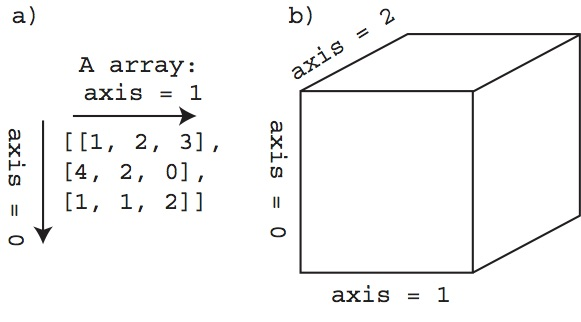

In [14]:
Image(filename='Figures/ndim.jpg') # Just ignore this - I just want to show you the pretty picture.

In [15]:
A = np.array([[1, 2, 3], [4, 2, 0], [1, 1, 2]]) # Redeclare A for good measure.
print("The dimensions of A are:", A.ndim)

The dimensions of A are: 2



Notice how `np.zeros()`, `np.ones()` and `np.ndarray()` used a tuple referred to via the keyword `shape` in order to define the arrays in the examples above. The shape of an array tells us how many elements are along each axis. Python returns a tuple with the shape information if we use the `shape` attribute:

In [16]:
A.shape

(3, 3)

### 7.4 Array methods

`ndarray`'s, like `list`, have numerous _methods_ however they are different than the  _methods_ we learned about for lists.  For example, you can append to an array (such a method is defined), but the results may surprise you.

In [17]:
print('D:\n', D)
print('\n')
print('D after append:\n', np.append(D, [2, 2, 2]))

D:
 [[0. 0. 0.]
 [0. 0. 0.]]


D after append:
 [0. 0. 0. 0. 0. 0. 2. 2. 2.]


See how we now have a 1-D array?  Not exactly what you expected?  We can deal with that problem by reshaping the array, as we shall see.  But first, you can also **concatenate** arrays which may be a simpler way to extend your array: 

In [18]:
print(np.concatenate((D, E)))

[[0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]]


To solve the shape problem (2-D versus 1-D), you can  re-arrange a 1-D array into a 2-D array (as long as the total number of elements is the same). To do that, we use the `ndarray.reshape()` method:

In [19]:
# We can take a 1-D array with 50 elements and reshape it into, say a 5 X 10 2-D array:
B_real_2D = B_real.reshape((5, 10))
print('B_real:\n', B_real)
print('\n B_real after reshaping:\n', B_real_2D)

B_real:
 [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7.
 7.2 7.4 7.6 7.8 8.  8.2 8.4 8.6 8.8 9.  9.2 9.4 9.6 9.8]

 B_real after reshaping:
 [[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8]
 [2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8]
 [4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8]
 [6.  6.2 6.4 6.6 6.8 7.  7.2 7.4 7.6 7.8]
 [8.  8.2 8.4 8.6 8.8 9.  9.2 9.4 9.6 9.8]]


You can go the other way, by taking a 2-D (or more) array and turning it into one long 1-D array using `ndarray.flatten()`.  

In [20]:
B_real_1D = B_real_2D.flatten()
print(B_real_1D)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7.
 7.2 7.4 7.6 7.8 8.  8.2 8.4 8.6 8.8 9.  9.2 9.4 9.6 9.8]


Another super useful array method is `ndarray.transpose()` \[equivalent to `ndarray.T()`\] which swaps rows and columns:

In [21]:
print('B_real_2D:\n', B_real_2D)
print('\n B_real_2D transposed:\n', B_real_2D.transpose())

B_real_2D:
 [[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8]
 [2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8]
 [4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8]
 [6.  6.2 6.4 6.6 6.8 7.  7.2 7.4 7.6 7.8]
 [8.  8.2 8.4 8.6 8.8 9.  9.2 9.4 9.6 9.8]]

 B_real_2D transposed:
 [[0.  2.  4.  6.  8. ]
 [0.2 2.2 4.2 6.2 8.2]
 [0.4 2.4 4.4 6.4 8.4]
 [0.6 2.6 4.6 6.6 8.6]
 [0.8 2.8 4.8 6.8 8.8]
 [1.  3.  5.  7.  9. ]
 [1.2 3.2 5.2 7.2 9.2]
 [1.4 3.4 5.4 7.4 9.4]
 [1.6 3.6 5.6 7.6 9.6]
 [1.8 3.8 5.8 7.8 9.8]]


### 7.5 Slicing and indexing ndarrays 

The syntax for slicing an `ndarray` is similar to that for a `list`:  

In [22]:
B = A[0:2] # Access the top two rows of A
print(B)

[[1 2 3]
 [4 2 0]]


### 7.6 Masking Arrays

We can also 'mask' arrays. This is a handy thing a bit like doing an `if` statement for an array. For example, we could make an array of numbers,  say, times, between 0 and 10 minutes and then search just for the times greater than 5 minutes.

In [23]:
time = np.linspace(0, 10, 11)
lateTime = time[time > 5.0]
print(lateTime)

[ 6.  7.  8.  9. 10.]


If two arrays are the same shape, we can use one array to mask another array. For example, we could make an array of distances traveled at a constant speed of 20 miles per hour, and mask to show only the distances for the last 5 minutes.

In [24]:
distance = time / 3.0
lateDistance = distance[time > 5.0]
print(lateDistance)

[2.         2.33333333 2.66666667 3.         3.33333333]


How does this work? We can peek into this by looking at the result when we print (`time > 5.0`). It turns out that this creates an array of values given by either `True` or `False` which tells the program what elements of the array to choose.

In [25]:
boolTime = time > 5.0
print(boolTime)

[False False False False False False  True  True  True  True  True]




For many more methods and attributes of `ndarray`'s, visit the NumPy Reference website:  http://docs.scipy.org/doc/numpy/reference/.   


### 7.7 Converting between data structures

We can convert from an `ndarray` to a `list`:

In [26]:
L = A.tolist()
print("Original array: \t", type(A)) # The '\t' inserts a tab space character
print("List form: \t\t", type(L))
print(A)
print(L)

# Notice the commas, the array turned into a list of three lists.

Original array: 	 <class 'numpy.ndarray'>
List form: 		 <class 'list'>
[[1 2 3]
 [4 2 0]
 [1 1 2]]
[[1, 2, 3], [4, 2, 0], [1, 1, 2]]


To convert a `list` to an `ndarray`, to this:

In [27]:
A_from_L = np.array(L) # From a list
print('A_from_L:')
print(A_from_L)

A_from_L:
[[1 2 3]
 [4 2 0]
 [1 1 2]]


Or from a tuple to an array:


In [28]:
A_from_T = np.array((4, 2)) # from a tuple 
print('A_from_T:')
print(A_from_T)

A_from_T:
[4 2]


### 7.8 Saving NumPy arrays as a text file

Having created, sliced and diced an array, it is often handy to save the data to a file for later use. We can do that with the command `np.savetxt()`.

Let's save our `A` array to a file called `A.txt`.

In [29]:
np.savetxt('A.txt', A)

In [30]:
# And clean up
os.remove('A.txt')

### References

1. For many more methods and attributes of `ndarray`'s, visit the NumPy Reference website:  https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html.
2. Learn about NumPy data types (`dtype` arg) here: https://numpy.org/doc/stable/reference/arrays.dtypes.html